A recommendation engine is a system that suggests products, services, or content to users based on their preferences, behavior, or interactions. These engines are widely used in e-commerce, streaming services, social media, and more to enhance user experience and drive engagement.

### Types of Recommendation Engines

1. **Content-Based Filtering**
   - **How It Works:** This approach recommends items similar to those a user has liked in the past. It analyzes the characteristics of items (like genre, keywords, etc.) and matches them with user preferences.
   - **Example:** A movie streaming service suggesting films based on previously watched movies.

2. **Collaborative Filtering**
   - **How It Works:** This method uses user behavior data to find similarities between users or items. It can be user-based (finding similar users) or item-based (finding similar items).
   - **Example:** An online bookstore recommending books based on what similar users have bought.

3. **Hybrid Systems**
   - **How It Works:** These systems combine multiple recommendation techniques, such as content-based and collaborative filtering, to improve accuracy and reduce limitations of individual methods.
   - **Example:** A music app suggesting songs based on both user listening habits and song characteristics.

4. **Knowledge-Based Systems**
   - **How It Works:** These systems leverage domain knowledge and user requirements. They often work well when user preferences are specific or when there’s little historical data.
   - **Example:** A travel recommendation engine suggesting destinations based on user preferences for climate and activities.

5. **Demographic-Based Recommendations**
   - **How It Works:** Recommendations are made based on demographic information (age, location, etc.) of users, aiming to find common preferences within specific groups.
   - **Example:** A fashion retailer recommending clothing styles based on the user's age group.

### Summary

Recommendation engines enhance user engagement by personalizing experiences. Different types of engines suit various contexts and data availability, making it essential to choose the right one based on the application and user needs.

# **Netflix Recommendation Engine**

Netflix's recommendation engine is a sophisticated system designed to suggest movies and TV shows tailored to individual user preferences. It primarily uses collaborative filtering and content-based filtering to analyze viewing history, ratings, and user behavior. By delving into patterns across millions of users, it identifies similar content and predicts what a user might enjoy next. Additionally, Netflix employs a hybrid approach, incorporating factors like viewing time, genre preferences, and even time of day to refine its suggestions, ultimately enhancing user satisfaction and engagement.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_dataset = pd.read_csv("/content/combined_data_1.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
movie_count =netflix_dataset.isnull().sum()['Rating']
movie_count

4499

In [ ]:
count =netflix_dataset['Cust_Id'].nunique()
count

475257

In [ ]:
customer_count = count-movie_count
customer_count

470758

In [ ]:
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


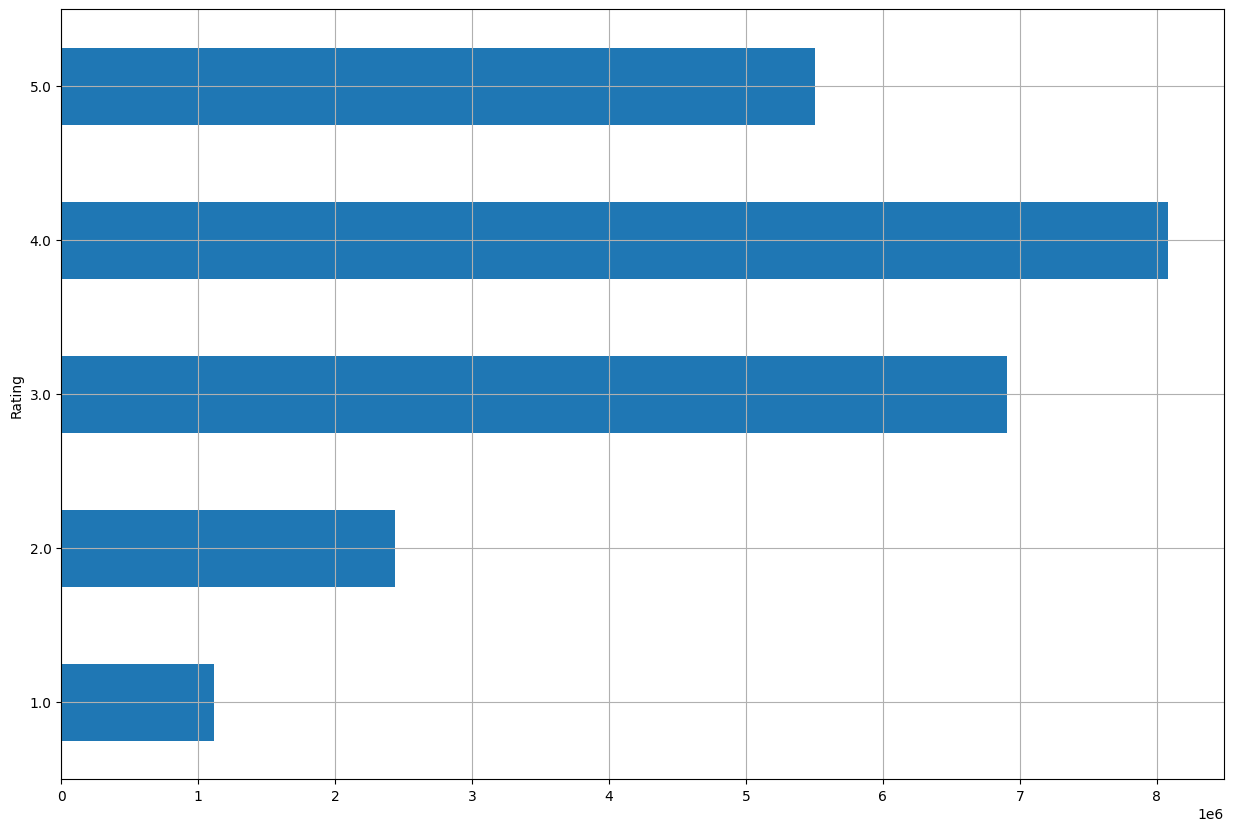

In [ ]:
ax = stars.plot(kind= 'barh',legend = False,figsize =(15,10))
plt.grid()

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
movie_id = []
for i in netflix_dataset['Cust_Id']:
  if ':' in i:
    movie = int(i.replace(':',''))
  movie_id.append(movie)

In [ ]:
movie_id

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset['Movie_Id'] = movie_id

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.dropna(inplace=True)

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
movie_rating_count = netflix_dataset.groupby('Movie_Id')['Rating'].agg(['count'])

In [ ]:
banchmarks = round(movie_rating_count['count'].quantile(0.6))

In [ ]:
drop_movie_list = movie_rating_count[movie_rating_count['count']<banchmarks].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
cust_Rating_count = netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count'])

In [ ]:
cust_Rating_count

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_banchmark  = round(cust_Rating_count['count'].quantile(0.6))

In [ ]:
drop_cust_list= cust_Rating_count[cust_Rating_count['count']<cust_banchmark].index

In [ ]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

# **Model Building**

In [ ]:
movie_title = pd.read_csv('/content/movie_titles (1).csv',encoding='latin1',header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

In [ ]:
movie_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
!pip install 'numpy<2.0.0'

In [ ]:
! pip install scikit-surprise

In [ ]:
from surprise import Reader, Dataset, SVD #singulr value decompostion
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:
model = SVD()
cross_validate(model,data,measures=['RMSE'],cv =3)

{'test_rmse': array([1.05335933, 1.04979768, 1.05215814]),
 'fit_time': (2.0465219020843506, 1.412128210067749, 1.388453483581543),
 'test_time': (0.2085254192352295, 0.4049794673919678, 0.15225648880004883)}

# **Recommendation**

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
movie_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
use_1331154 = movie_title.copy()

In [ ]:
use_1331154 = use_1331154[~use_1331154['Movie_Id'].isin(drop_movie_list)]

In [ ]:
use_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
use_1331154['Estimate_Score'] = use_1331154['Movie_Id'].apply(lambda x:model.predict(1331154,x).est)

In [ ]:
use_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.640734
4,5,2004.0,The Rise and Fall of ECW,3.992281
5,6,1997.0,Sick,3.129136
7,8,2004.0,What the #$*! Do We Know!?,3.238051
15,16,1996.0,Screamers,3.157767
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.527802
17766,17767,2004.0,Fidel Castro: American Experience,3.527802
17767,17768,2000.0,Epoch,3.527802
17768,17769,2003.0,The Company,3.527802


In [ ]:
use_1331154.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,3.992281
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.968318
27,28,2002.0,Lilo and Stitch,3.881227
17,18,1994.0,Immortal Beloved,3.790551
29,30,2003.0,Something's Gotta Give,3.757607
...,...,...,...,...
15,16,1996.0,Screamers,3.157767
5,6,1997.0,Sick,3.129136
23,24,1981.0,My Bloody Valentine,3.085663
16,17,2005.0,7 Seconds,2.902288


In [ ]:
top5_movies=use_1331154.sort_values('Estimate_Score', ascending=False).head(5)


In [ ]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,3.992281
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.968318
27,28,2002.0,Lilo and Stitch,3.881227
17,18,1994.0,Immortal Beloved,3.790551
29,30,2003.0,Something's Gotta Give,3.757607
